<h1> Linear Regression </h1>

In [1]:
# import required library
import numpy as np
import matplotlib.pyplot as plt

<h2> Linear Regression with one variable </h2>

In this part we will implement linear regression with one variable to predict profits for a food truck. Suppose we are considering different cities for opening a new outlet. We have data for profits and populations from the cities.
We would like to use this data to help us select which city to expand to next.
The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

In [2]:
# read data from file
data = np.loadtxt('ex1data1.txt', delimiter=',')
print(data[:10])

[[ 6.1101 17.592 ]
 [ 5.5277  9.1302]
 [ 8.5186 13.662 ]
 [ 7.0032 11.854 ]
 [ 5.8598  6.8233]
 [ 8.3829 11.886 ]
 [ 7.4764  4.3483]
 [ 8.5781 12.    ]
 [ 6.4862  6.5987]
 [ 5.0546  3.8166]]


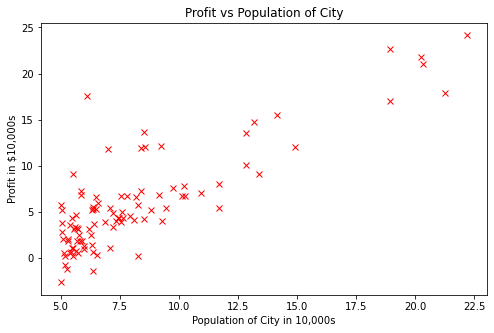

In [3]:
# Let's plot profit vs population of city
plt.figure(figsize=(8,5))
plt.plot(data[:,0], data[:,1], 'rx')
plt.title('Profit vs Population of City')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s');

The objective of linear regression is to minimize the cost function:

$J(\theta) = \frac{1}{2m}\sum \limits _{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2$

where the hypothesis $h_{\theta}(x)$ is given by the linear model

$h_{\theta}(x) = \theta^{T}x = \theta_{0} + \theta_{1}x_{1}$

Let's prepare our variables.

In [4]:
# create variable m to keep number of training examples
m = data.shape[0]

# keep profit (target for linear regression task) in y as vector
y = data[:,1].reshape(m,1)

# keep city's population (feature in linear regression) in X as matrix, we will add a columns of ones (intercept)
X = np.column_stack((np.ones((m, 1)), data[:,0]))

# initialize fitting parameters
theta = np.zeros((2, 1))

Let's write a function that will calculate cost for given X, y and $\theta$

In [5]:
def compute_cost(X, y, theta):
    m = len(y) # number of training examples
    
    return 0.5/m * np.sum((X@theta-y)**2)

Let's check our cost function with thetas for which we know what is the correct cost value.

In [6]:
J = compute_cost(X, y, theta)
print('With theta =')
print(theta)
print(f'computed cost = {J: .8}')
print('Expected cost value (approx) 32.07');

# further testing of the cost function
t = np.array([[-1],[2]])
J = compute_cost(X, y, t);
print('With theta =')
print(t)
print(f'computed cost = {J: .8}')
print('Expected cost value (approx) 54.24');

With theta =
[[0.]
 [0.]]
computed cost =  32.072734
Expected cost value (approx) 32.07
With theta =
[[-1]
 [ 2]]
computed cost =  54.242455
Expected cost value (approx) 54.24


We need to find $\theta$ that minimize cost $J(\theta)$. One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update

$ \theta_{j} := \theta_{j} - \alpha \frac{1}{m} \sum \limits_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})x_{j}^{(i)}$

(simultaneously update $\theta_{j}$ for all $j$)

Let's write function to realize gradient descent algorythm.

In [7]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y) # number of training examples
    J_history = np.zeros((num_iters, 1))
    
    for i in range(num_iters):
        theta = theta - alpha/m * (X.T@(X@theta-y))
        # Save the cost J in every iteration
        J_history[i] = compute_cost(X, y, theta);
    return theta, J_history

Let's run gradient descent to find our solution for linear regression.

In [8]:
# Some gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = gradient_descent(X, y, theta, alpha, iterations)

# print theta to screen
print('Theta found by gradient descent:');
print(theta);

Theta found by gradient descent:
[[-3.63029144]
 [ 1.16636235]]


Let's plot history of cost function to check if our algorythm works correctly. The cost should decrease constantly.

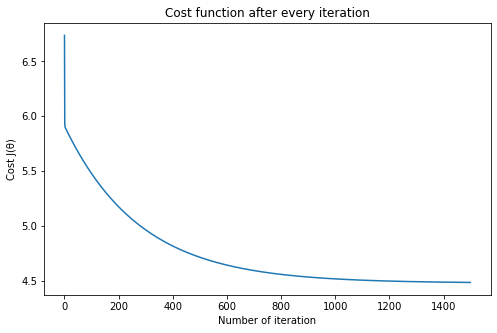

In [9]:
plt.figure(figsize=(8,5))
plt.plot(J_history)
plt.xlabel('Number of iteration')
plt.ylabel('Cost J(\u03B8)');
plt.title('Cost function after every iteration');

Let's pplot our solution and training data on one plot.

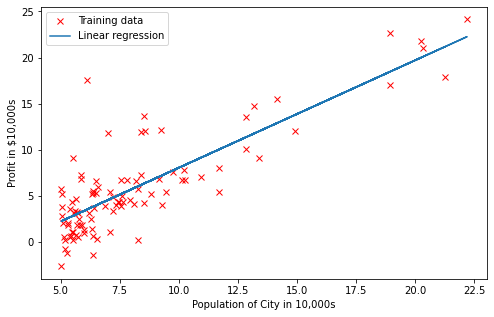

In [10]:
plt.figure(figsize=(8,5))
plt.plot(X[:,1], y, 'rx', label='Training data')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')

plt.plot(X[:,1], X@theta, label='Linear regression') # we can do it like this since we know that it will draw straight line
plt.legend();

Let's estimate the expected profit for cities with population equal to 35000 and 70000.

In [11]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = (np.array([1, 3.5])@theta).squeeze()
print(f'For population = 35,000, we predict a profit of {predict1*10000: .8}')
predict2 = (np.array([1, 7])@theta).squeeze()
print(f'For population = 70,000, we predict a profit of {predict2*10000: .8}')

For population = 35,000, we predict a profit of  4519.7679
For population = 70,000, we predict a profit of  45342.45


For better understading of how gradient descent works we can plot 3d surface plot of cost function.

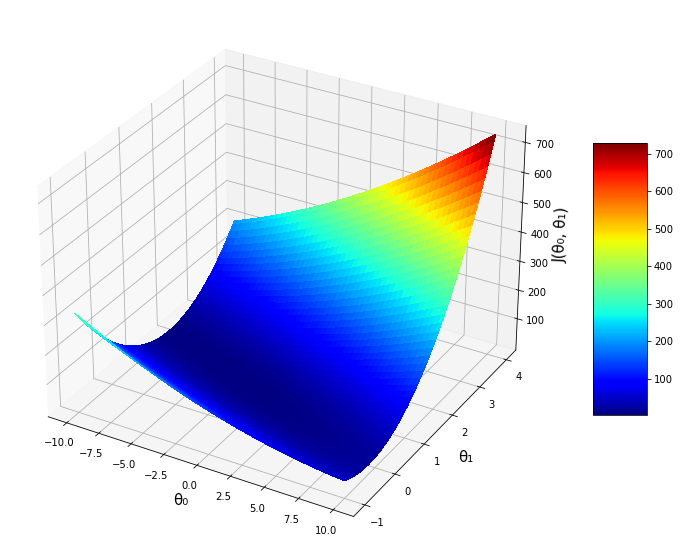

In [12]:
# Visualizing J(theta)
fig, ax = plt.subplots(figsize=(15,10), subplot_kw={"projection": "3d"})

## Make data
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta1_vals), len(theta0_vals)))

# Fill out J_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = [[theta0_vals[i]], [theta1_vals[j]]]
        J_vals[j,i] = compute_cost(X, y, t) # J_vals[j,i] (not [i,j]) other way we will have to transpose J_vals
                                            # to meet 'plot_surface' requirments

# process theta0_vals and theta1_vals with np.meshgrid to meet 'plot_surface' requirments
theta0_mesh, theta1_mesh = np.meshgrid(theta0_vals, theta1_vals)

# Plot the surface.
surf = ax.plot_surface(theta0_mesh, theta1_mesh, J_vals, cmap='jet',
                       linewidth=0, antialiased=False)

ax.xaxis.set_label_text('\u03B8\u2080', fontsize=15)
ax.yaxis.set_label_text('\u03B8\u2081', fontsize=15)
ax.zaxis.set_label_text('J(\u03B8\u2080, \u03B8\u2081)', fontsize=15)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

We will also plot a contour plot of cost function and mark our solution found by gradient descent.

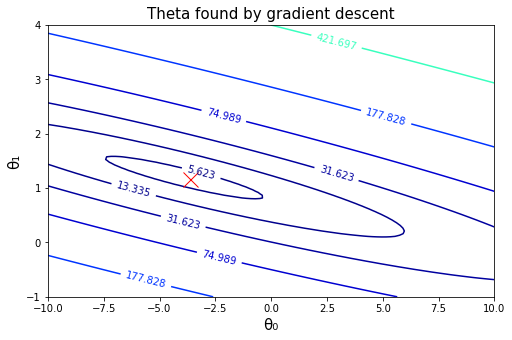

In [13]:
fig, ax = plt.subplots(figsize=(8,5))
levels = np.logspace(0, 3, 9)
CS = ax.contour(theta0_mesh, theta1_mesh, J_vals, levels=levels, cmap='jet')
ax.clabel(CS, inline=True, fontsize=10)
ax.plot(theta[0],theta[1],'rx', markersize=15)
ax.set_title('Theta found by gradient descent', fontsize=15)
ax.xaxis.set_label_text('\u03B8\u2080', fontsize=15)
ax.yaxis.set_label_text('\u03B8\u2081', fontsize=15);

<h2> Linear regression with multiple variables </h2>

In this part, we will implement linear regression with multiple variables to predict the prices of houses. Suppose we are selling our house and we want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

In [14]:
# read the data from file
data = np.loadtxt('ex1data2.txt', delimiter=',')
print(data[:10])

[[2.10400e+03 3.00000e+00 3.99900e+05]
 [1.60000e+03 3.00000e+00 3.29900e+05]
 [2.40000e+03 3.00000e+00 3.69000e+05]
 [1.41600e+03 2.00000e+00 2.32000e+05]
 [3.00000e+03 4.00000e+00 5.39900e+05]
 [1.98500e+03 4.00000e+00 2.99900e+05]
 [1.53400e+03 3.00000e+00 3.14900e+05]
 [1.42700e+03 3.00000e+00 1.98999e+05]
 [1.38000e+03 3.00000e+00 2.12000e+05]
 [1.49400e+03 3.00000e+00 2.42500e+05]]


Let's get features and target from our data.

In [15]:
# get number of examples
m = data.shape[0]

# get target - houses prices - and keep it in the form of vector
y = data[:,2].reshape(m,1)

# get features - houses sizes and number of bedrooms
X = data[:,:2]

By looking at the values, we can note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

In [16]:
# get mean values of features (data columns 0 and 1)
X_mean = X.mean(axis=0)

# get standard deviation of featres
X_std = X.std(axis=0)

# compute normalized featuures
X_norm = (X - X_mean)/X_std

# now we need only to add a columns of ones to X - for intercept
X = np.column_stack((np.ones((m, 1)), X_norm))

# print few first examples
X[:10]

array([[ 1.        ,  0.13141542, -0.22609337],
       [ 1.        , -0.5096407 , -0.22609337],
       [ 1.        ,  0.5079087 , -0.22609337],
       [ 1.        , -0.74367706, -1.5543919 ],
       [ 1.        ,  1.27107075,  1.10220517],
       [ 1.        , -0.01994505,  1.10220517],
       [ 1.        , -0.59358852, -0.22609337],
       [ 1.        , -0.72968575, -0.22609337],
       [ 1.        , -0.78946678, -0.22609337],
       [ 1.        , -0.64446599, -0.22609337]])

For computing cost function we could use our 'compute_cost' function that we have writen earlier, but we will write new function that will use vectorized form of cost function:

$J(\theta) = \frac{1}{2m}(X\theta - y)^{T}(X\theta - y)$

In [17]:
def compute_cost_vect(X, y, theta):
    m = len(y) # number of training examples
    
    return 0.5/m * (X@theta - y).T@(X@theta - y)

Let's compare the execution time of both version of our function.

In [18]:
import time

theta = np.zeros((3,1))

start = time.time()
for i in range(1000000):
    a = compute_cost(X, y, theta)
print('Execution time of non-vectoried version: ', time.time()-start)

start = time.time()
for i in range(1000000):
    a = compute_cost_vect(X, y, theta)
print('Execution time of vectoried version: ', time.time()-start)

Execution time of non-vectoried version:  10.4732027053833
Execution time of vectoried version:  8.116204977035522


We can see that the vectorized version performs better.

Now let's find our solution using gradient descent. To run it using new vectorized cost function we need to write new gradien descent function.

In [19]:
def gradient_descent_vect(X, y, theta, alpha, num_iters):
    m = len(y) # number of training examples
    J_history = np.zeros((num_iters, 1))
    
    for i in range(num_iters):
        theta = theta - alpha/m * (X.T@(X@theta-y))
        # Save the cost J in every iteration
        J_history[i] = compute_cost_vect(X, y, theta);
    return theta, J_history

Let's run gradient descent.

In [20]:
# Some gradient descent settings
iterations = 400
alpha = 0.3

theta, J_history = gradient_descent(X, y, theta, alpha, iterations)

# print theta to screen
print('Theta found by gradient descent:')
print(theta)

Theta found by gradient descent:
[[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]


Let's plot history of cost function.

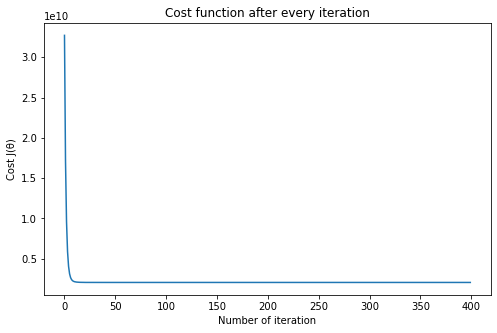

In [21]:
plt.figure(figsize=(8,5))
plt.plot(J_history)
plt.xlabel('Number of iteration')
plt.ylabel('Cost J(\u03B8)');
plt.title('Cost function after every iteration');

Let's try few values of learning rate (alpha parameter) and check how it can influence on gradient descent convergence speed.

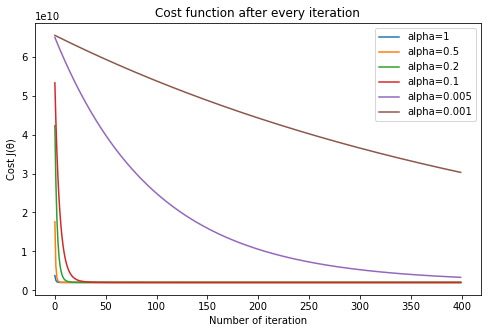

In [22]:
# Some gradient descent settings
iterations = 400
alphas = [1, 0.5, 0.2, 0.1, 0.005, 0.001]

plt.figure(figsize=(8,5))
for i in range(len(alphas)):
    theta = np.zeros((3,1))
    theta, J = gradient_descent(X, y, theta, alphas[i], iterations)
    plt.plot(J, label='alpha='+str(alphas[i]))
plt.xlabel('Number of iteration')
plt.ylabel('Cost J(\u03B8)')
plt.legend()
plt.title('Cost function after every iteration');

If we want to predict price of house with gived parameters we need to remember about normalization. Let's say that we want to prodict price of house of size 1650 sq-ft and having 3 bedrooms.

In [23]:
price = np.hstack(([1],(np.array([1650, 3])-X_mean)/X_std))@theta.squeeze()
print(f'Predicted price of a 1650 sq-ft, 3 br house is{price: .8}$.')

Predicted price of a 1650 sq-ft, 3 br house is 94156.271$.


<h2> Normal equation</h2>

We can also find the solution using normal equation:

$\theta = (X^{T}X)^{-1}X^{T}y$

instead of gradient descent. In this case we don't need to normalize features.

In [24]:
# redefine features
X = np.column_stack((np.ones((m,1)), data[:,:2]))

# compute theta using normal equation
theta = np.linalg.pinv(X.T@X)@X.T@y
print('Theta found by solving normal equation:');
print(theta);

Theta found by solving normal equation:
[[89597.90954361]
 [  139.21067402]
 [-8738.01911255]]


Let's check what wolud be the price of a 1650 sq-ft, 3 bedrooms house using normal equation solution.

In [25]:
price = np.hstack(([1], np.array([1650, 3])))@theta.squeeze()
print(f'Predicted price of a 1650 sq-ft, 3 br house is{price: .8}$.')

Predicted price of a 1650 sq-ft, 3 br house is 293081.46$.


<h2>Simple class for linear regression</h2>

Let's write a simple class that wolud enable user to fit linear regression model and make predictions on new data. If there would be given less then 2000 examples for fitting the model, it wolud use normal equation, otherwise it wolud use gradient descent. The gradient descent is more efficient for big number of examples given to train model.

While creating object for our model we can define learnig rate and number of iterations for gradient descent. By default they get values of 0.01 and 1500 respectively.

While passing the features to the model we don't need to add columns of ones. The model does it for us.

In [26]:
# class definition
class myLinearRegressionModel():
    def __init__(self, alpha=0.01, num_iters=1500):
        self.alpha = alpha
        self.num_iters = num_iters
    
    # function for features normalization when gradient descent is used
    def normalize(self, X):
        # get mean values of features
        self.X_mean = X.mean(axis=0)
        # get standard deviation of features
        self.X_std = X.std(axis=0)
        # compute normalized featuures
        X_norm = (X - self.X_mean)/self.X_std
        return X_norm
    
    # function to compute cost, it is used to control if gradient descent is converging
    def compute_cost(self, X, y, theta):
        # get number of samples
        m = len(y)
        
        return 0.5/m * (X@theta - y).T@(X@theta - y)
    
    # function to compute theta parameters using gradient descent
    def gradient_descent(self, X, y):
        # init theta
        theta = np.zeros((X.shape[1],1))
        cost = self.compute_cost(X, y, theta)
        
        for i in range(self.num_iters):
            theta = theta - self.alpha/m * (X.T@(X@theta-y))
            new_cost = self.compute_cost(X, y, theta)
            # checking if cost is decreasing with every iteration
            if new_cost > cost:
                print('Gradient descent is not converging. Try smaller learning rate.')
                break
            cost = new_cost
        self.theta = theta
       
    def fit(self, X, y):
        # ckeck the number of samples
        m = X.shape[0]
        
        if m < 2000: # use normal equation
            # keep the info that we do not need to normalize features
            self.use_normalization = False
            # add intercept
            X2 = np.column_stack((np.ones((m,1)), X))
            # find solution
            self.theta = np.linalg.pinv(X2.T@X2)@X2.T@y
            # just to inform about the method that was used
            print('Theta found using normal equation:\n', self.theta)
        else: # use gradient descent
            # keep the info that we need to normalize features
            self.use_normalization = True
            # normalize features
            X2 = self.normalize(X)
            # add intercept
            X2 = np.column_stack((np.ones((m,1)), X2))
            # run gradient descent
            self.gradient_descent(X2,y)
            # just to inform about the method that was used
            print('Theta found using gradient descent:\n', self.theta)
        return self
    
    def predict(self, X):
        X2 = X.copy()
        # ckeck the number of samples
        m = X.shape[0]
        
        if self.use_normalization:
            X2 = (X2 - self.X_mean)/self.X_std
            
        # add columns of ones to X
        X3 = np.hstack((np.ones((m,1)), X2))
        
        return X3@self.theta

Let's check if it is working. At firts let's try it on the data with house prices.

In [27]:
# create object for our model
lr = myLinearRegressionModel()

# get number of examples
m = data.shape[0]

# get target - houses prices - and keep it in the form of vector
y = data[:,2].reshape(m,1)

# get features - houses sizes and number of bedrooms
X = data[:,:2]

# fit our model
lr.fit(X,y);

Theta found using normal equation:
 [[89597.90954361]
 [  139.21067402]
 [-8738.01911255]]


We can see that normal equation was used to find solution.

Let's make some predictions.

In [28]:
X_test = np.array([[1650, 3], # our previous example
                 [2000, 4],  # new example
                 [1500, 2]]) # new example
lr.predict(X_test)

array([[293081.46433499],
       [333067.1811286 ],
       [280937.8823449 ]])

For house with 1650 sq-ft and 3 bedrooms we get the same estimated price.

Let's generate new data with over 2000 examples to check gradient descent.

In [29]:
X1 = np.linspace(0,100,10000) # 10,000 values for first feature 
X2 = np.linspace(0,10,10000) # 10,000 values for second feature 
# generate target values
y = X1 + 2* X2
# and make vector
y = y.reshape(len(y),1)

# add some noise to features and concatenate it
X1 = X1 + np.random.normal(0,1,len(X1))
X2 = X2 + np.random.normal(0,1,len(X2))
X = np.column_stack((X1,X2))
X[:10]

array([[ 0.13022218,  0.09000271],
       [-1.23480994, -0.06559482],
       [ 0.73682139,  1.60054886],
       [ 0.79068511, -0.17632154],
       [-1.7411671 ,  0.03063048],
       [ 0.697589  , -0.26407949],
       [-0.14541224, -1.42422281],
       [ 0.10368824,  0.88615715],
       [ 1.05512415, -1.07044663],
       [-1.03784732,  0.29917251]])

Let's fit our model with new data

In [30]:
lr.fit(X,y);

Gradient descent is not converging. Try smaller learning rate.
Theta found using gradient descent:
 [[127.65957447]
 [ 73.66769532]
 [ 69.6729336 ]]


As we can see we need to try smaller learning rate.

In [31]:
# create new model with smaller learning rate
lr = myLinearRegressionModel(alpha=0.0001)

# fit the model
lr.fit(X,y);

Theta found using gradient descent:
 [[60.        ]
 [31.36220906]
 [ 3.28443521]]


In [32]:
X_test = np.array([[0, 0], # expected 0
                   [0, 10],  # expected 20
                   [100, 0], # expected 100
                   [100, 10]]) # expected 120
lr.predict(X_test)

array([[  0.3692773 ],
       [ 11.0909537 ],
       [108.90876821],
       [119.63044461]])

We can see that our model performs very well. The estimation's errors are caused by the noise that was added to training data.

Our model can be used to solve regression proglems quick and easy:)